# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question


The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Data: Predictive Maintenance - Machine Failure

Exploring the Who, What, and How of Predictive Maintenance - machgine failure for presenting to a hypothetical audience.

Who
Primary Audience: Operations managers, maintenance supervisors, and engineers responsible for the upkeep of machinery and equipment.

Secondary Audience: C-level executives and stakeholders interested in operational efficiency and cost reduction.

What
What is the main message?: Effective predictive maintenance can significantly reduce machine failure rates, leading to increased operational efficiency and cost savings.

Key Insights:

Identify patterns and conditions that lead to machine failures.

Highlight the benefits of implementing predictive maintenance strategies.

Demonstrate how data-driven insights can optimize maintenance schedules and prevent unexpected downtime.

How
How will you convey this message?:

Visualizations: Use clear and impactful charts and graphs to illustrate machine failure trends, failure rates, and the impact of predictive maintenance on reducing failures. This could include line charts showing failure rates over time, bar charts comparing failure rates before and after implementing predictive maintenance, and pie charts showing the distribution of different failure causes.

Narrative: Tell a compelling story that guides the audience through the data. Start with the problem (frequent machine failures), then introduce the solution (predictive maintenance), and finally showcase the positive outcomes (reduced failure rates and cost savings).

Examples and Case Studies: Include real-world examples or case studies of companies that have successfully implemented predictive maintenance, highlighting the tangible benefits they achieved.

Interactive Elements: If possible, create interactive dashboards that allow the audience to explore the data on their own. This can help them see how predictive maintenance can be applied to their specific context.



In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [5]:

df=pd.read_csv("machine_failure.csv")
df.head()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,1551,42.8,0,0,0,0,0,0
1,1408,46.3,3,0,0,0,0,0
2,1498,49.4,5,0,0,0,0,0
3,1433,39.5,7,0,0,0,0,0
4,1408,40.0,9,0,0,0,0,0


In [12]:
colms = df.columns
colms

Index(['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'Machine failure'],
      dtype='object')

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [6]:
df.describe()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
count,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000
mean,1526.383393,40.330015,107.913602,0.004483,0.011717,0.004483,0.009577,0.029139
std,147.306781,9.420254,63.626881,0.066808,0.107613,0.066808,0.097398,0.168205
min,1168.000000,16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1422.000000,33.600000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1501.000000,40.200000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1606.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2076.000000,68.900000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rotational speed [rpm]  9815 non-null   int64  
 1   Torque [Nm]             9815 non-null   float64
 2   Tool wear [min]         9815 non-null   int64  
 3   TWF                     9815 non-null   int64  
 4   HDF                     9815 non-null   int64  
 5   PWF                     9815 non-null   int64  
 6   OSF                     9815 non-null   int64  
 7   Machine failure         9815 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 613.6 KB


In [ ]:
# Check if there are any null values in the entire DataFrame
has_null = df.isnull().values.any()
has_null

NameError: name 'df' is not defined

In [9]:
# Count total null values in the entire DataFrame
total_null_count = df.isnull().sum().sum()
total_null_count

np.int64(0)

In [10]:
# Find duplicate rows
duplicates = df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
9810    False
9811    False
9812    False
9813    False
9814     True
Length: 9815, dtype: bool

In [11]:
# View duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
836                     1586         35.5                0    0    0    0   
5387                    1368         49.5               10    0    0    0   
6464                    1457         40.4              213    0    0    0   
8784                    1518         36.0               59    0    0    0   
9723                    1487         43.2              206    0    0    0   
9814                    1500         40.2               30    0    0    0   

      OSF  Machine failure  
836     0                0  
5387    0                0  
6464    0                0  
8784    0                0  
9723    0                0  
9814    0                0  


In [13]:


# Calculate mean, median, and mode for each column
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]

# Display the results
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nMode values:\n", mode_values)


Mean values:
 Rotational speed [rpm]    1526.383393
Torque [Nm]                 40.330015
Tool wear [min]            107.913602
TWF                          0.004483
HDF                          0.011717
PWF                          0.004483
OSF                          0.009577
Machine failure              0.029139
dtype: float64

Median values:
 Rotational speed [rpm]    1501.0
Torque [Nm]                 40.2
Tool wear [min]            108.0
TWF                          0.0
HDF                          0.0
PWF                          0.0
OSF                          0.0
Machine failure              0.0
dtype: float64

Mode values:
 Rotational speed [rpm]    1452.0
Torque [Nm]                 40.2
Tool wear [min]              0.0
TWF                          0.0
HDF                          0.0
PWF                          0.0
OSF                          0.0
Machine failure              0.0
Name: 0, dtype: float64


In [ ]:
# Calculate age in years, rounding down
current_date = datetime.now()
df['Age'] = (current_date - df['BirthDate']).dt.days // 365

# Calculate mean, median, and mode of ages
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode().values[0]

# Identify outliers using the IQR method
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify ages that are considered outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]['Age']

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")
print(f"Outliers: {outliers.values}")

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

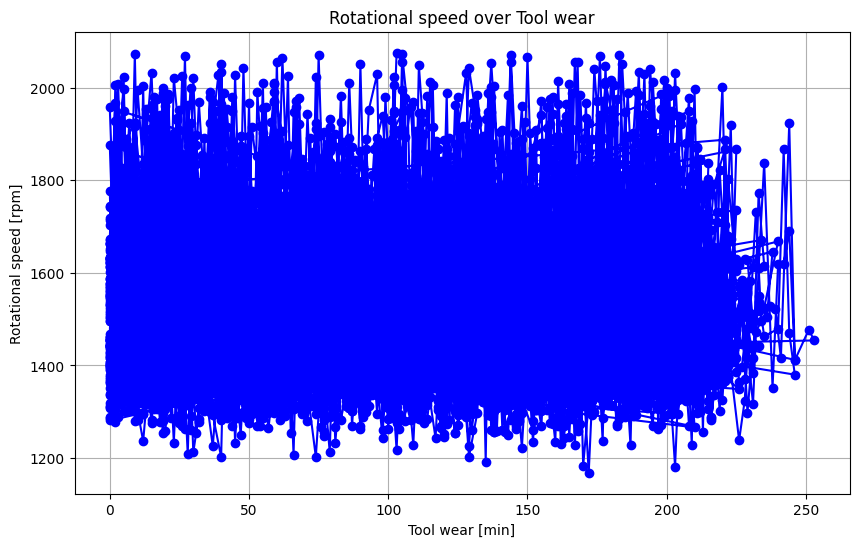

In [15]:


# Create a line graph for Rotational speed [rpm]
plt.figure(figsize=(10, 6))
plt.plot(df['Tool wear [min]'], df['Rotational speed [rpm]'], marker='o', linestyle='-', color='b')
plt.xlabel('Tool wear [min]')
plt.ylabel('Rotational speed [rpm]')
plt.title('Rotational speed over Tool wear')
plt.grid(True)
plt.show()


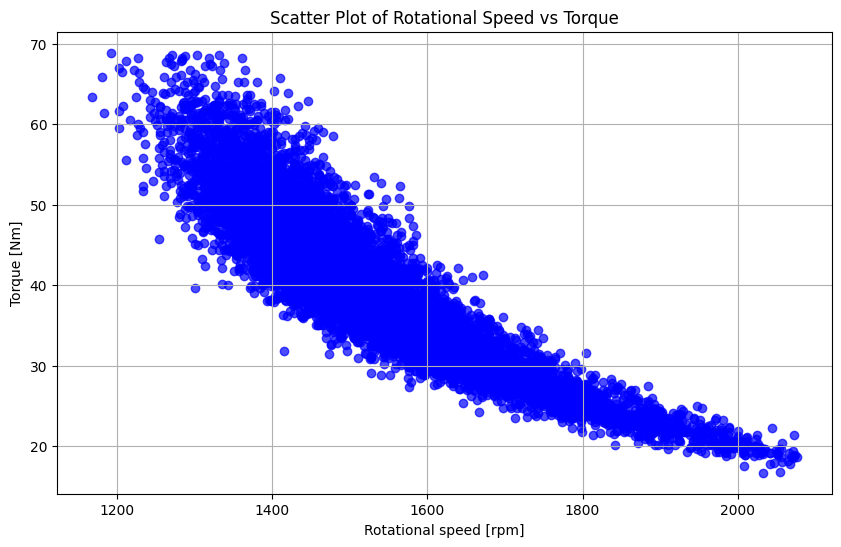

In [16]:
import matplotlib.pyplot as plt

# Create a scatter plot for Rotational speed [rpm] vs Torque [Nm]
plt.figure(figsize=(10, 6))
plt.scatter(df['Rotational speed [rpm]'], df['Torque [Nm]'], color='blue', alpha=0.7)
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.title('Scatter Plot of Rotational Speed vs Torque')
plt.grid(True)
plt.show()


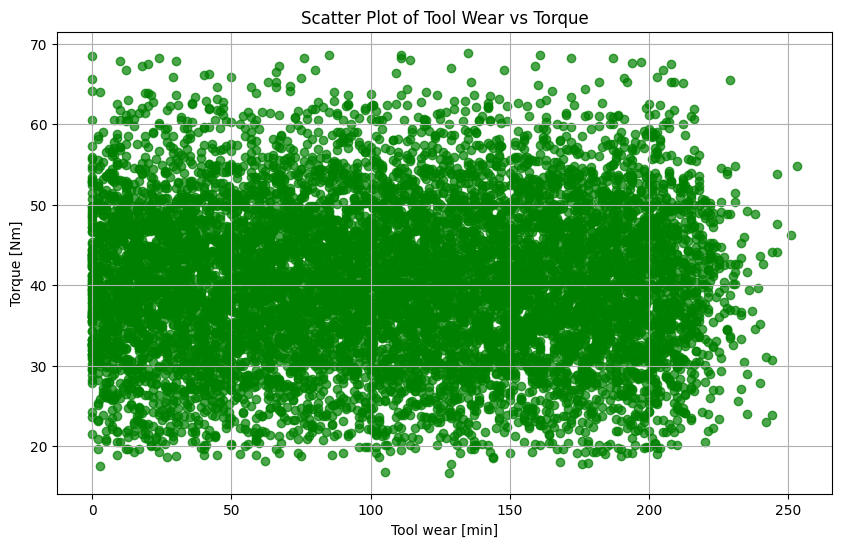

In [17]:

# Create a scatter plot for Tool wear [min] vs Torque [Nm]
plt.figure(figsize=(10, 6))
plt.scatter(df['Tool wear [min]'], df['Torque [Nm]'], color='green', alpha=0.7)
plt.xlabel('Tool wear [min]')
plt.ylabel('Torque [Nm]')
plt.title('Scatter Plot of Tool Wear vs Torque')
plt.grid(True)
plt.show()


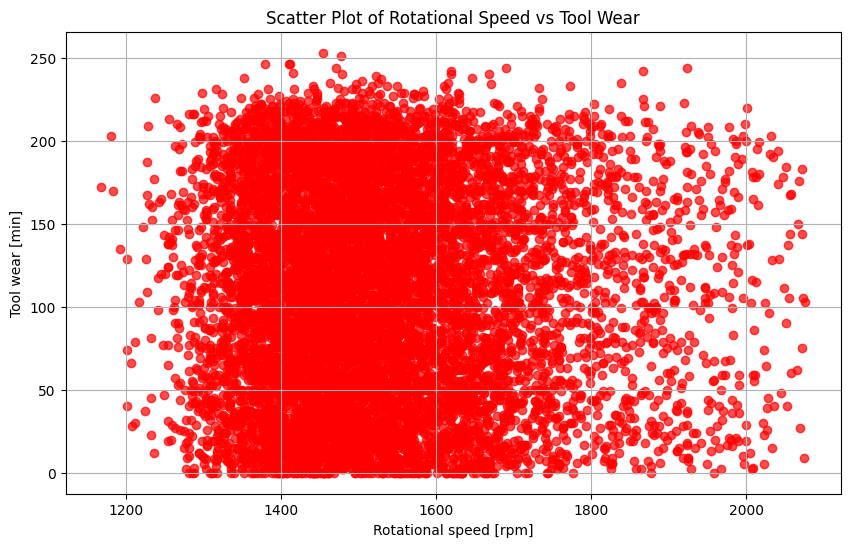

In [18]:


# Create a scatter plot for Rotational speed [rpm] vs Tool wear [min]
plt.figure(figsize=(10, 6))
plt.scatter(df['Rotational speed [rpm]'], df['Tool wear [min]'], color='red', alpha=0.7)
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Tool wear [min]')
plt.title('Scatter Plot of Rotational Speed vs Tool Wear')
plt.grid(True)
plt.show()
